Nama : Muhamad Iqbal<br>
NIM : 211351088<br>
Kelas : IF Pagi B

# Import dataset

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mawarwiliyanti","key":"9b36d17610bd35878637447fafbdf7e9"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download uom190346a/sleep-health-and-lifestyle-dataset

  0% 0.00/2.54k [00:00<?, ?B/s]
100% 2.54k/2.54k [00:00<00:00, 6.23MB/s]


In [6]:
!mkdir sleep-health-and-lifestyle-dataset
!unzip sleep-health-and-lifestyle-dataset.zip -d sleep-health-and-lifestyle-dataset
!ls sleep-health-and-lifestyle-dataset

Archive:  sleep-health-and-lifestyle-dataset.zip
  inflating: sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv  
Sleep_health_and_lifestyle_dataset.csv


# Import Library yang digunakan

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from scipy import stats

#Data discovery

In [59]:
df= pd.read_csv('sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [60]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [61]:
df = df.drop(['Person ID'], axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [63]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [64]:
df.sample()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
34,Male,31,Doctor,7.7,7,75,6,Normal,120/80,70,8000,None


In [65]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [66]:
numerical = []
catgcols = []

for col in df.columns:
  if df[col].dtype=="float64":
    numerical.append(col)
  else:
    catgcols.append(col)

  for col in df.columns:
    if col in numerical:
      df[col].fillna(df[col].median(), inplace=True)
    else:
      df[col].fillna(df[col].mode(), inplace=True)

In [67]:
numerical

['Sleep Duration']

In [68]:
catgcols

['Gender',
 'Age',
 'Occupation',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [69]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [70]:
grouped_data = df.groupby('Sleep Disorder')['Occupation'].value_counts().reset_index(name='count')

In [71]:
grouped_data.sort_values(by='count',ascending=False)

,Sleep Disorder,Occupation,count
8,None,Doctor,64
18,Sleep Apnea,Nurse,61
9,None,Engineer,57
10,None,Lawyer,42
11,None,Accountant,30
0,Insomnia,Salesperson,29
1,Insomnia,Teacher,27
12,None,Nurse,9
13,None,Teacher,9
2,Insomnia,Accountant,7


#EDA Minimal 5

<ipython-input-72-2544e40684e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

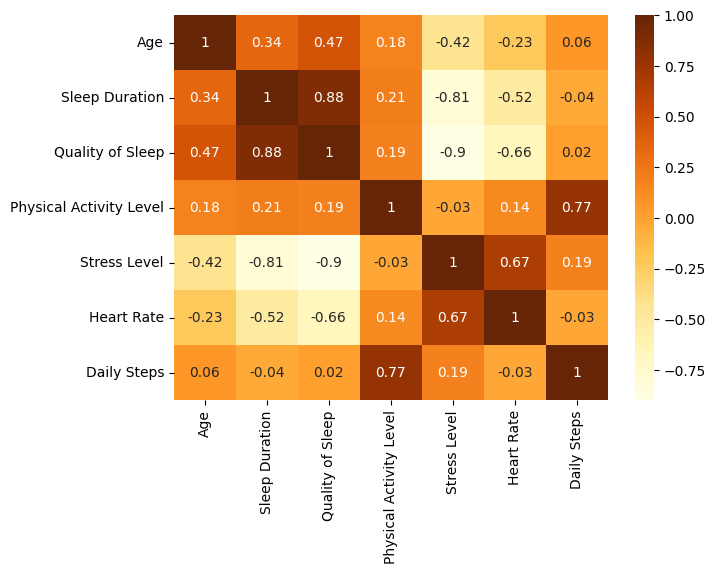

In [72]:
corr = df.corr().round(2)
plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [73]:
num_col=['Age','Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'Heart Rate', 'Daily Steps','BMI Category']

<Axes: title={'center': 'Variable Sleep Disorder'}, xlabel='Sleep Disorder', ylabel='count'>

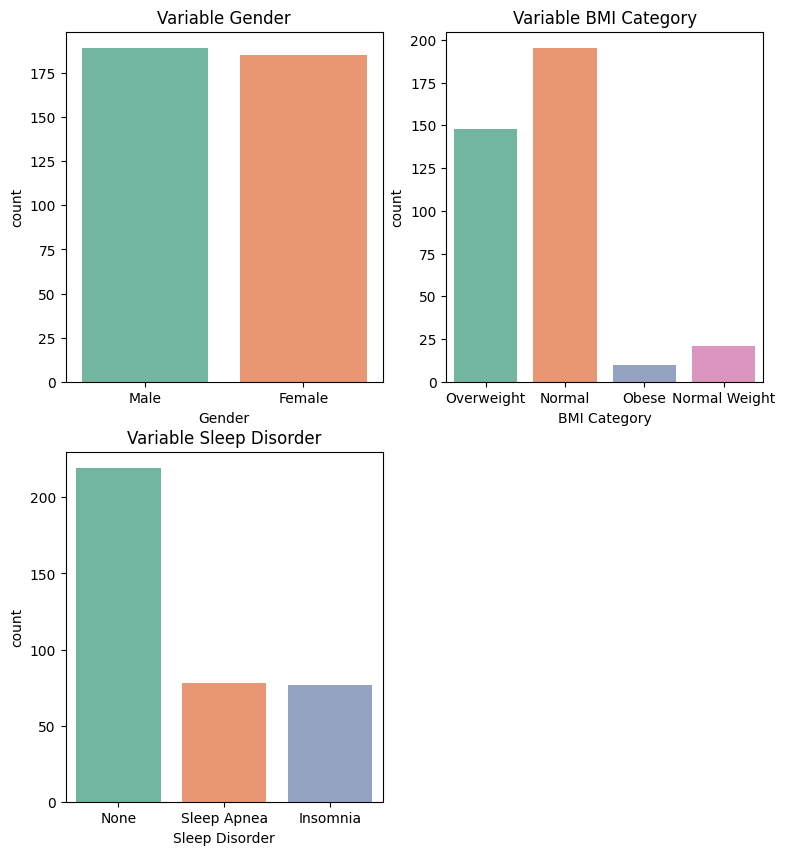

In [74]:
plt.figure(figsize = (9, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Sleep Disorder')
sns.countplot(x = 'Sleep Disorder', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

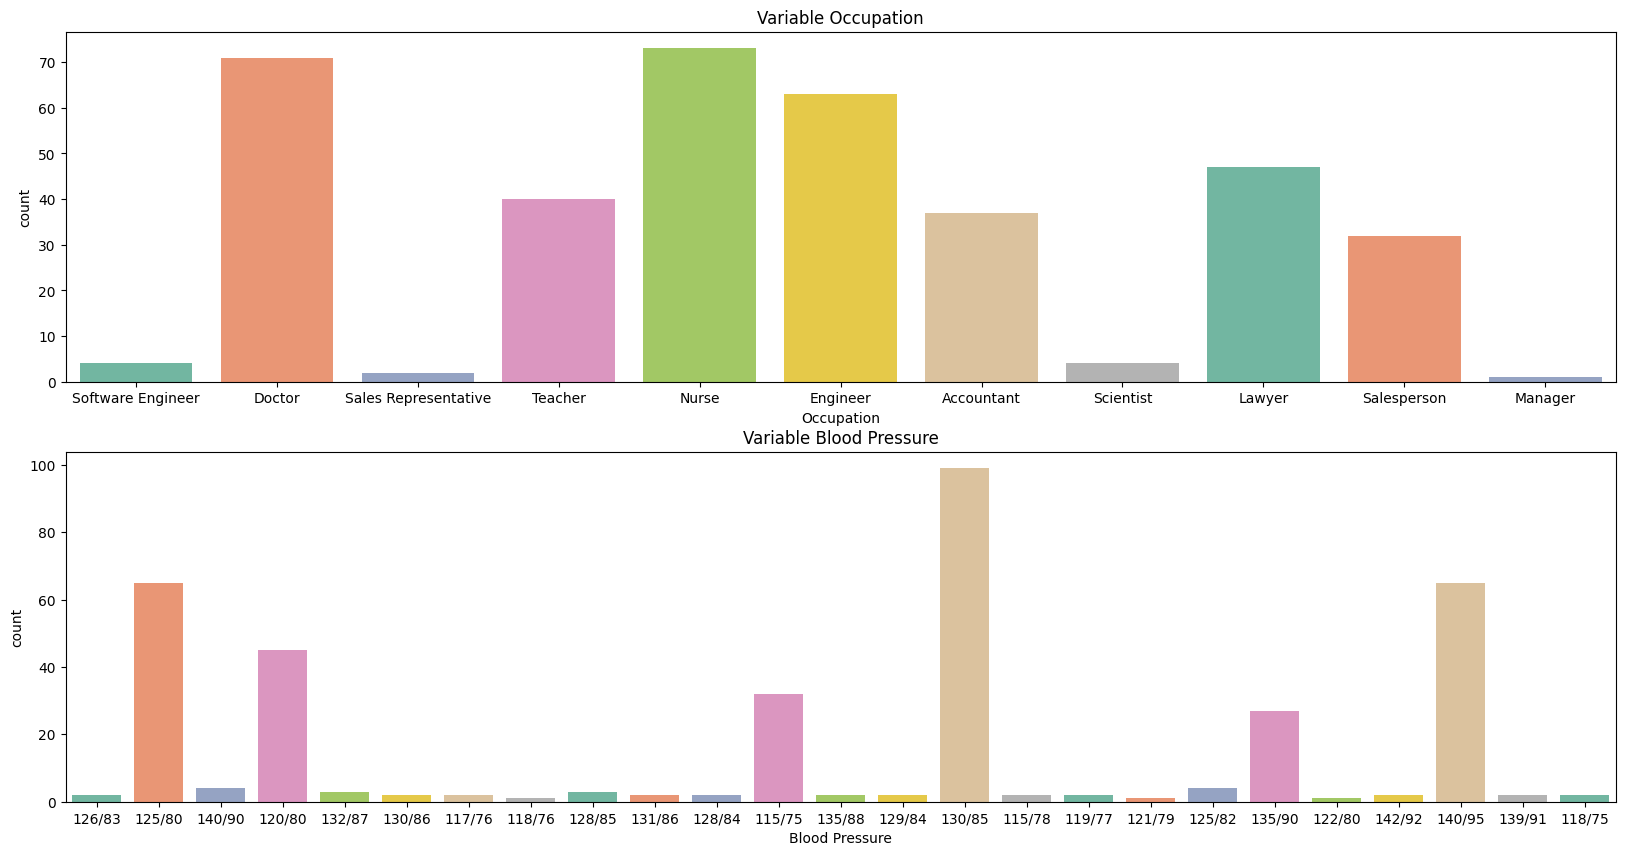

In [75]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable BMI Category'}, xlabel='BMI Category', ylabel='count'>

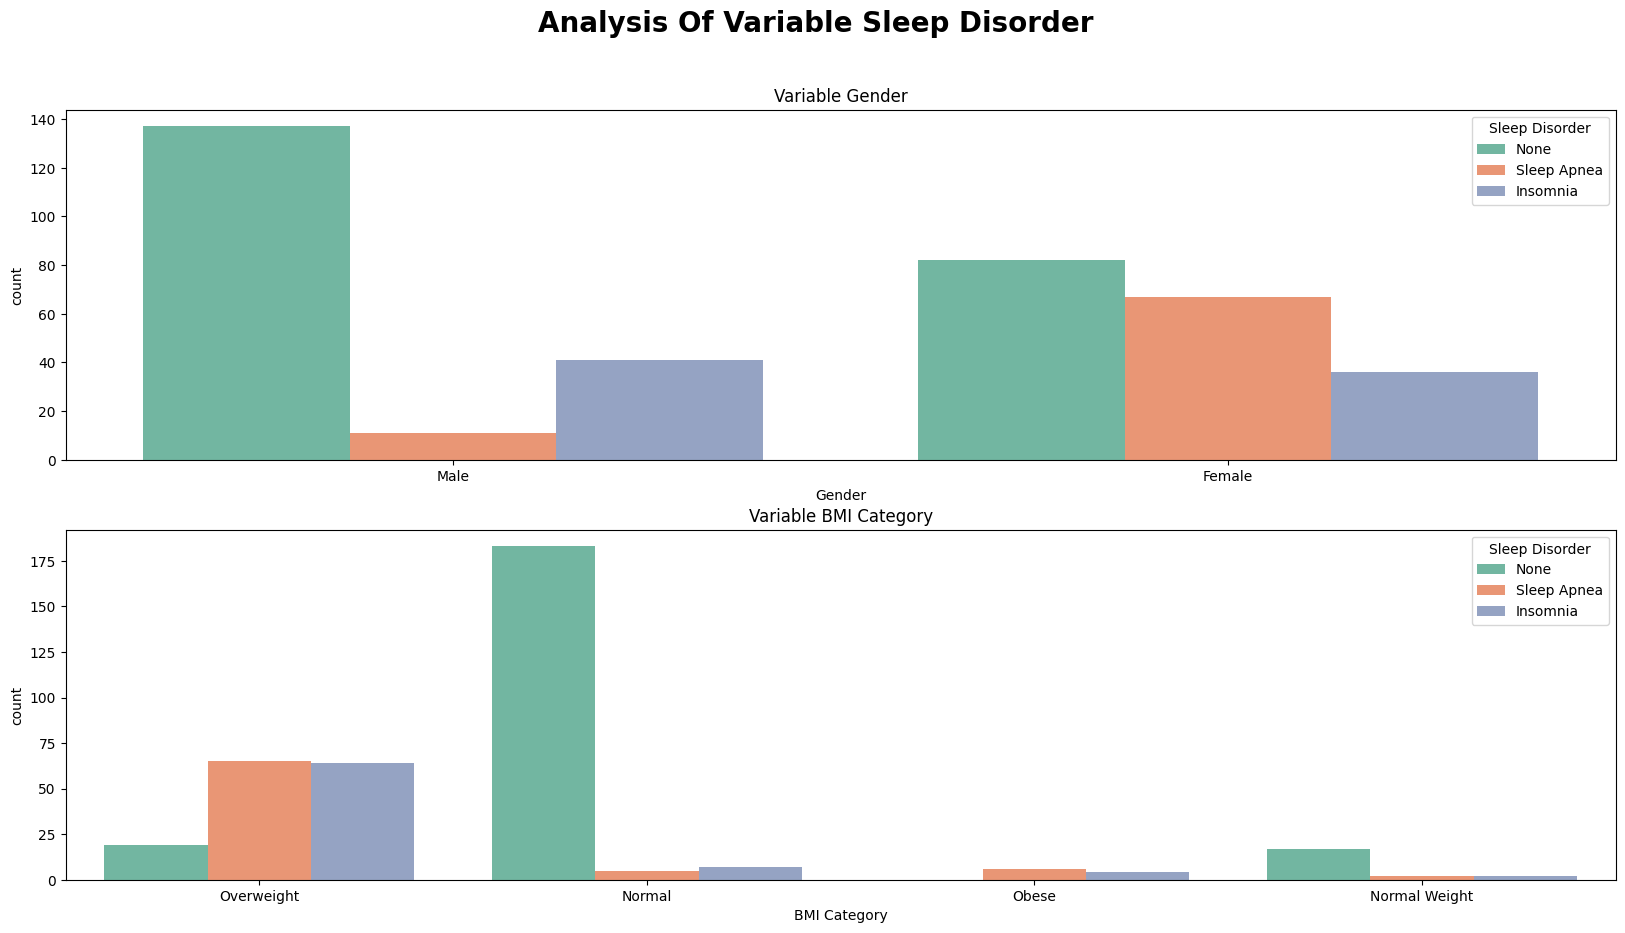

In [76]:
plt.figure(figsize = (20, 10))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Sleep Disorder', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Blood Pressure'}, xlabel='Blood Pressure', ylabel='count'>

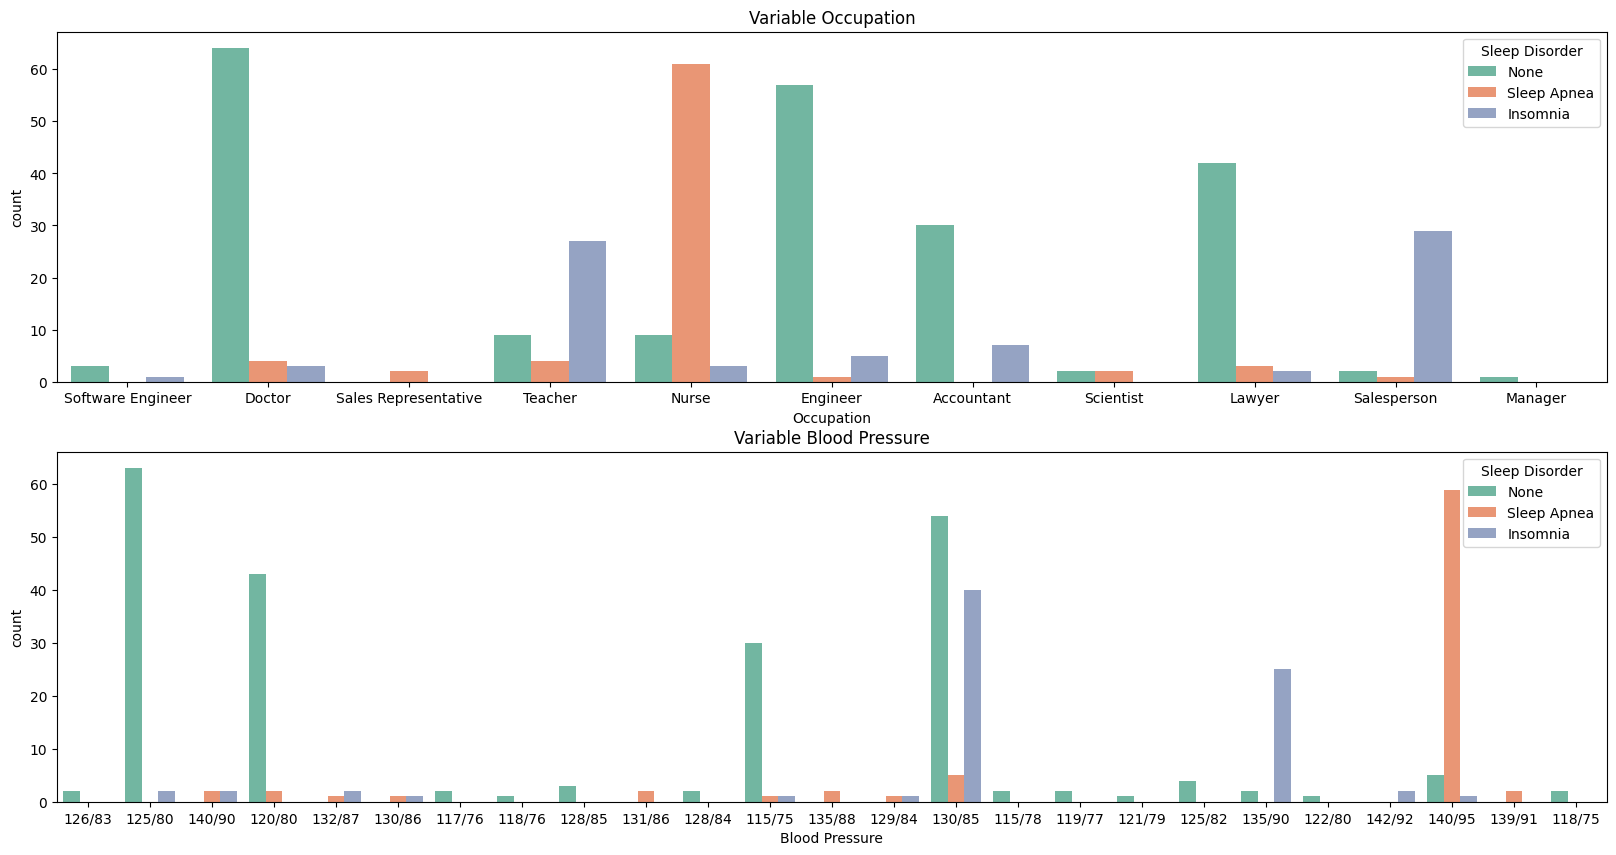

In [77]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Occupation')
sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Blood Pressure')
sns.countplot(x = 'Blood Pressure', hue = 'Sleep Disorder', palette = 'Set2', data = df)

<Axes: xlabel='Sleep Disorder', ylabel='Daily Steps'>

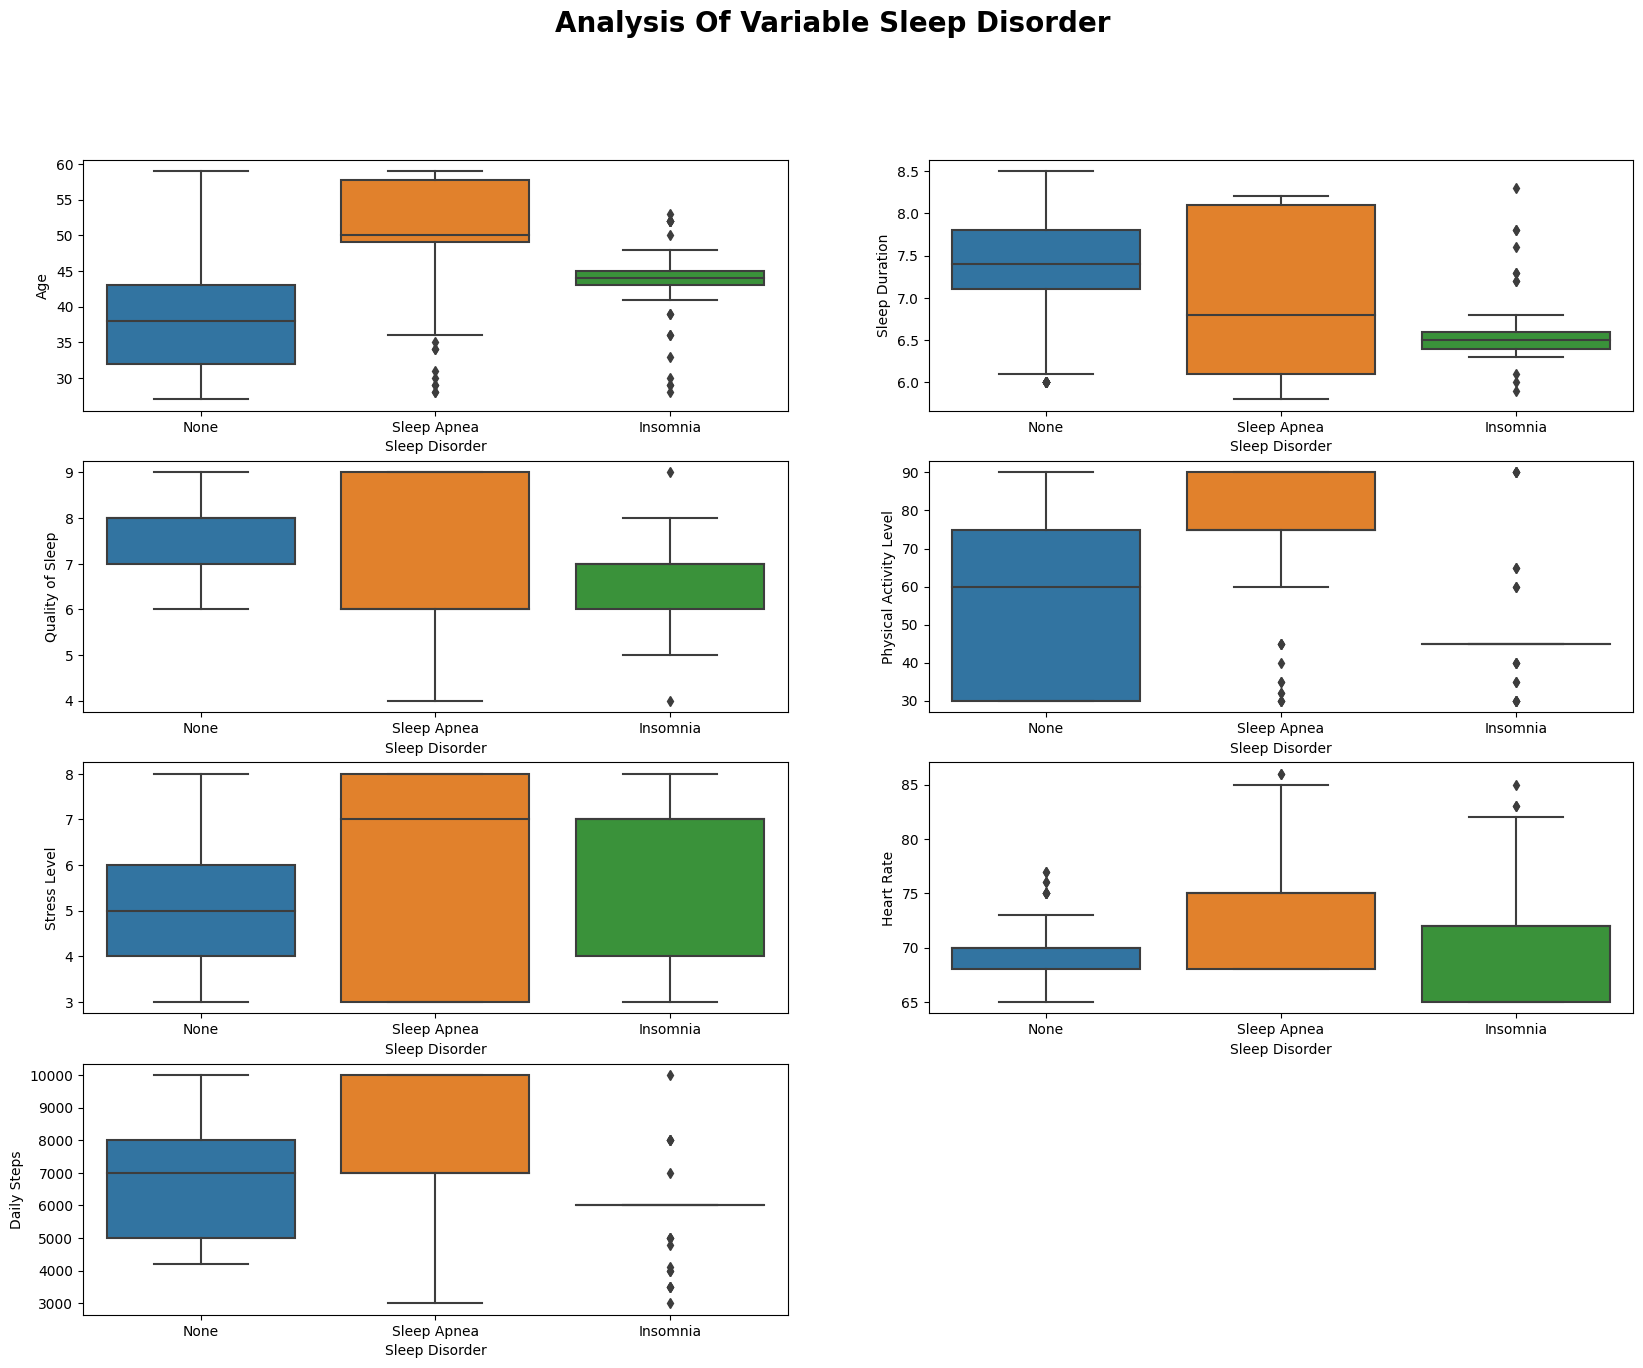

In [78]:
plt.figure(figsize = (20, 15))
plt.suptitle("Analysis Of Variable Sleep Disorder",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="Sleep Disorder", y="Age", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="Sleep Disorder", y="Sleep Duration", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="Sleep Disorder", y="Quality of Sleep", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="Sleep Disorder", y="Physical Activity Level", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="Sleep Disorder", y="Heart Rate", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="Sleep Disorder", y="Daily Steps", data=df)

# Preprocessing

In [79]:
ind_col = [col for col in df.columns if col != 'Sleep Disorder']
dep_col = 'Sleep Disorder'

In [80]:
x = df[ind_col]
y = df[dep_col]

In [81]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  374


,Total Missing,In Percent
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
Sleep Duration,0,0.0
Quality of Sleep,0,0.0
Physical Activity Level,0,0.0
Stress Level,0,0.0
BMI Category,0,0.0
Blood Pressure,0,0.0
Heart Rate,0,0.0


In [82]:
print(df['Gender'].unique())
print(df['BMI Category'].unique())
print(df['Sleep Disorder'].unique())

['Male' 'Female']
['Overweight' 'Normal' 'Obese' 'Normal Weight']
['None' 'Sleep Apnea' 'Insomnia']


In [83]:
df['Sleep Disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64

In [84]:
def fix_BMI (x):
    if x == 'Normal Weight':
        return 'Normal'
    return x

df['BMI Category'] = df['BMI Category'].apply(lambda x : fix_BMI(x))

In [85]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [86]:
df["Gender"]=l1.fit_transform(df["Gender"])
df["Age"]=l1.fit_transform(df["Age"])
df["Occupation"]=l1.fit_transform(df["Occupation"])
df["BMI Category"]=l1.fit_transform(df["BMI Category"])
df["Blood Pressure"]=l1.fit_transform(df["Blood Pressure"])
df["Heart Rate"]=l1.fit_transform(df["Heart Rate"])
df["Sleep Disorder"]=l1.fit_transform(df["Sleep Disorder"])
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,9,6.1,6,42,6,2,11,10,4200,1
1,1,1,1,6.2,6,60,8,0,9,8,10000,1
2,1,1,1,6.2,6,60,8,0,9,8,10000,1
3,1,1,6,5.9,4,30,8,1,22,17,3000,2
4,1,1,6,5.9,4,30,8,1,22,17,3000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,30,5,8.1,9,75,3,2,23,2,7000,2
370,0,30,5,8.0,9,75,3,2,23,2,7000,2
371,0,30,5,8.1,9,75,3,2,23,2,7000,2
372,0,30,5,8.1,9,75,3,2,23,2,7000,2


In [87]:
df.sample()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
90,1,8,2,7.3,8,60,4,0,9,0,5000,1


In [88]:
features = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',	'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
x = df[features]
y = df['Sleep Disorder']
print(x.shape)
print(y.shape)

(374, 11)
(374,)


In [89]:
df.to_csv('sleep-health.csv')

# Modelling

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9230769230769231
akurasi data testing = 0.9066666666666666 

confusion matrix : 
[[16  2  2]
 [ 1 40  0]
 [ 1  1 12]]

classification report : 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.93      0.98      0.95        41
           2       0.86      0.86      0.86        14

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



# Simulasi model

In [92]:
input_data = (1,14,3,7.6,4,15,2,0,15,4,18)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 1:
    print('Pasien Tidak Mengalami Sleep Disorder')
elif prediction[0] == 2:
    print('Pasien Mengalami Sleep Apnia')
else:
    print('Pasien Mengalami Insomnia')

[1]
Pasien Tidak Mengalami Sleep Disorder


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

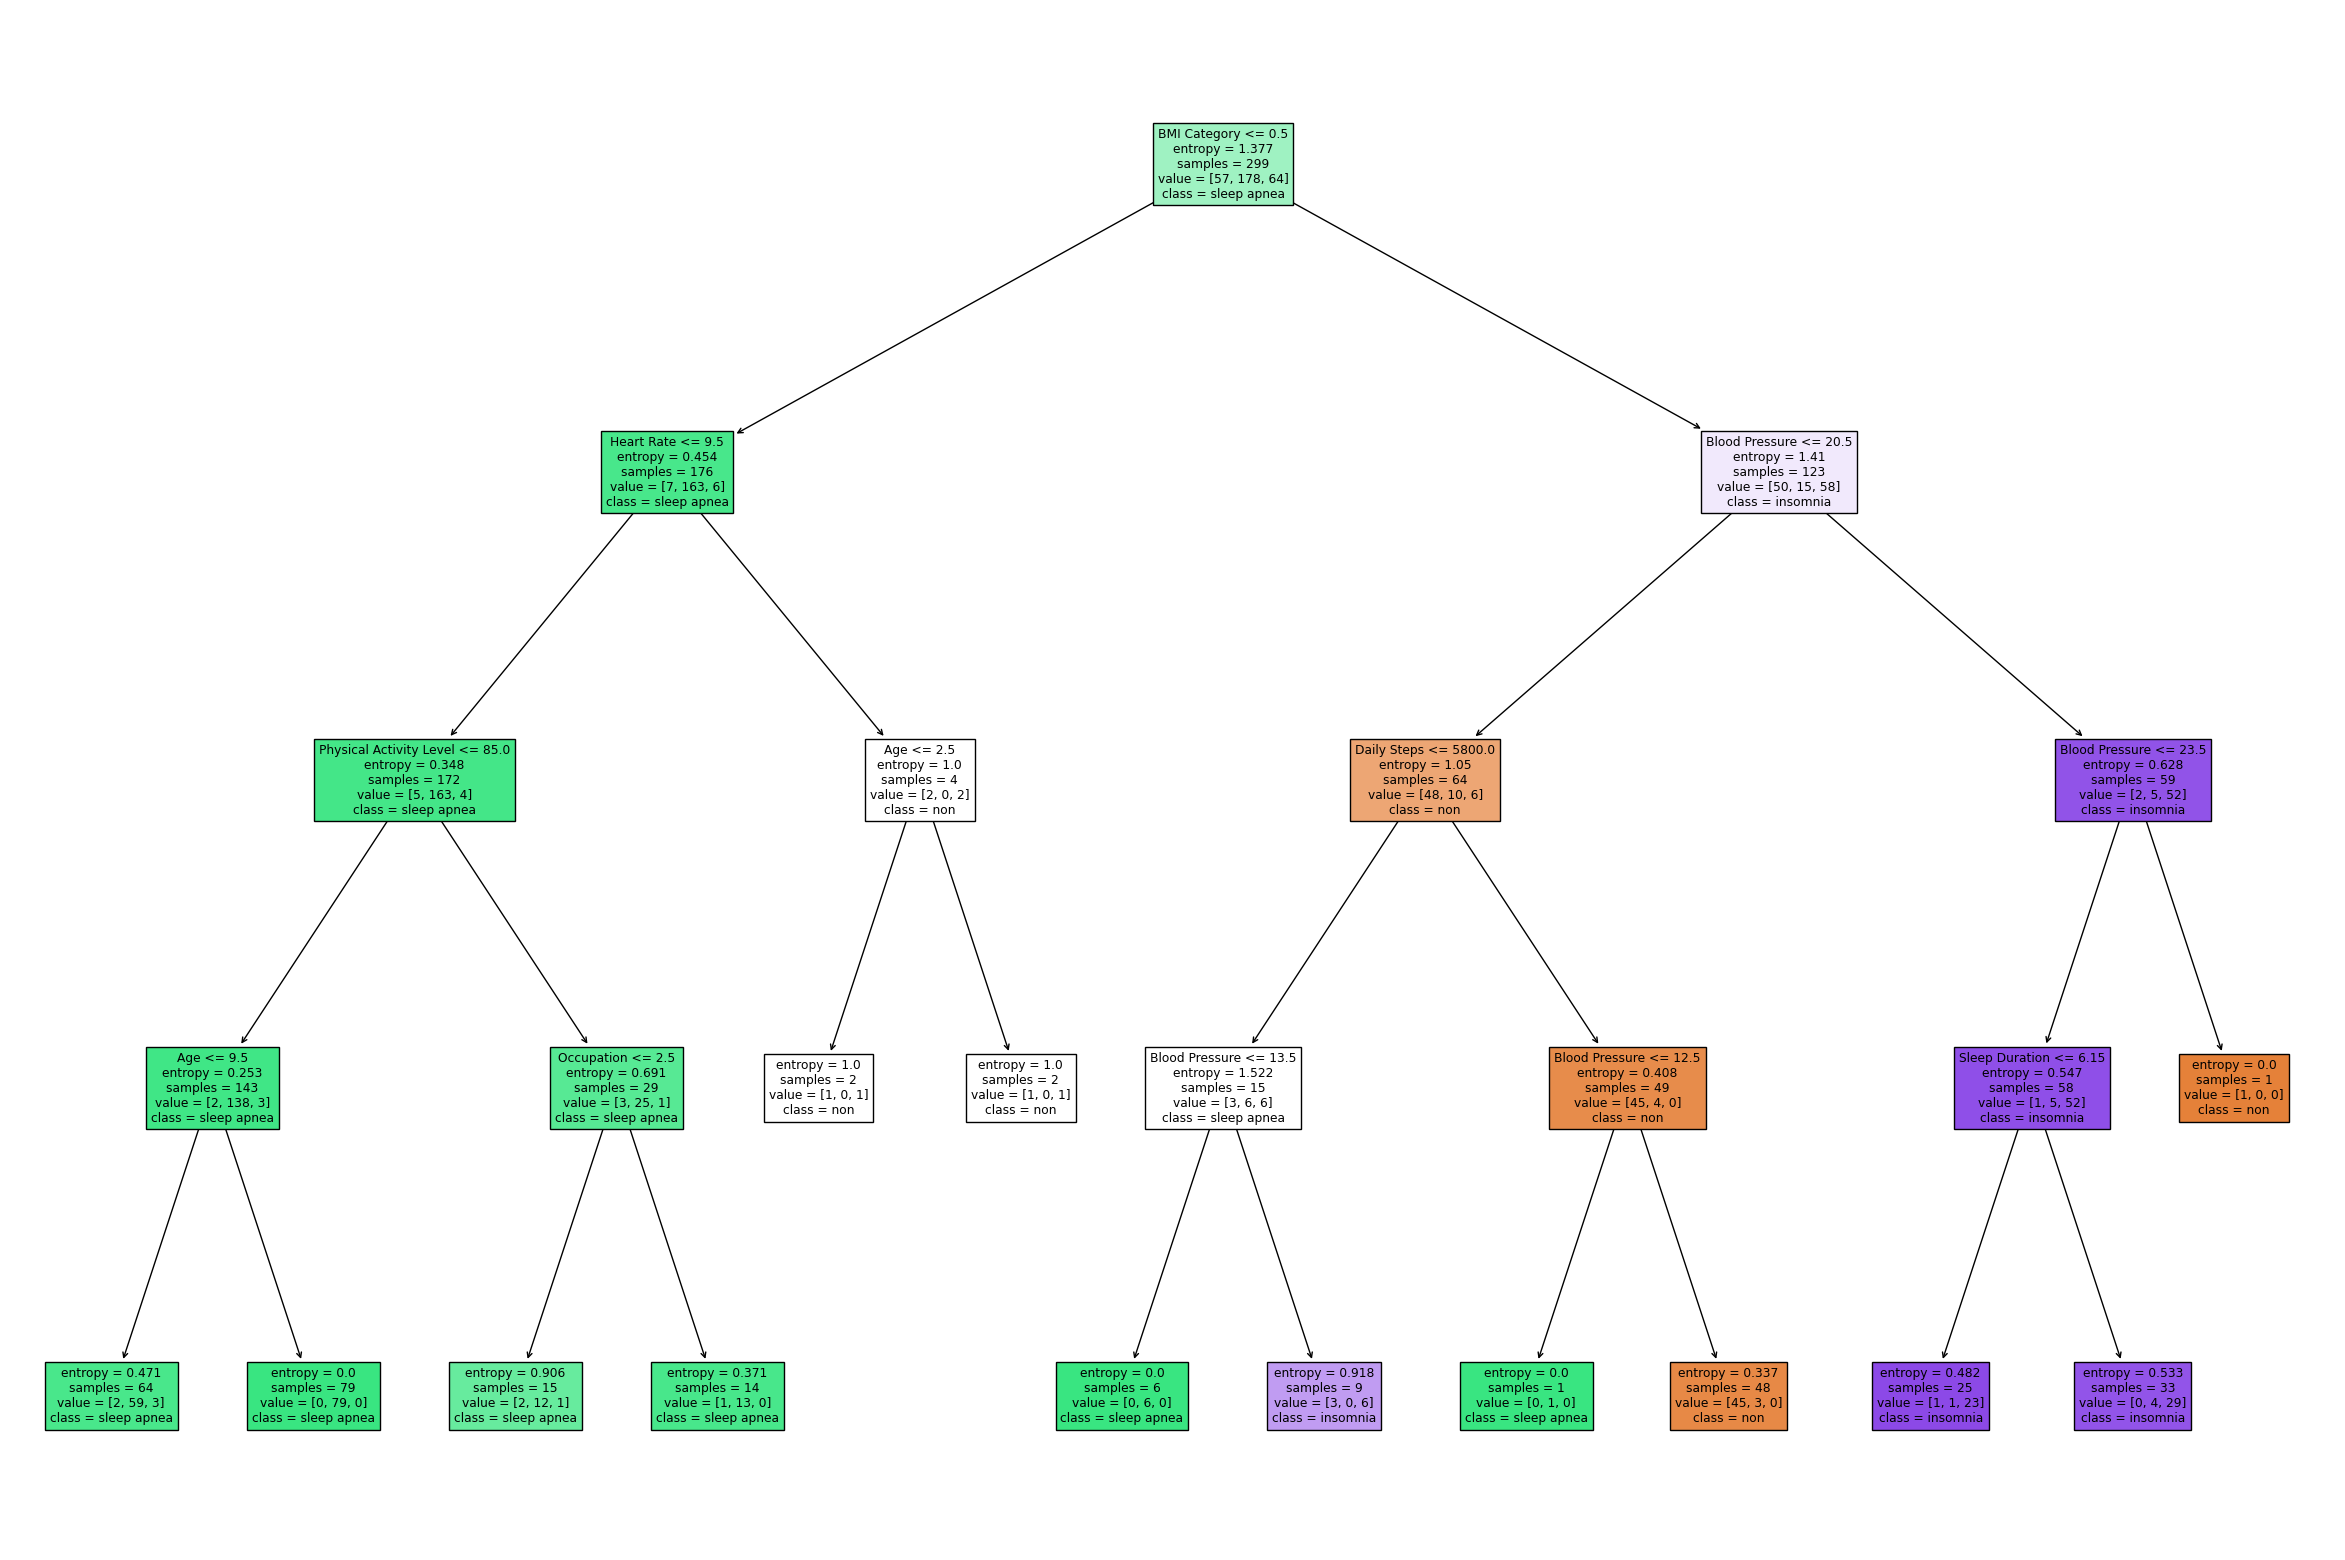

In [93]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['non', 'sleep apnea', 'insomnia'],
                   filled=True)